## 0. 课程大纲

### 0.1 一维傅里叶变换
```python
np.fft.fft(x)
np.fft.ifft(x)
np.abs(c)
np.angle(c)
np.real(c)
np.imag(c)
```

### 0.2 二维傅里叶变换
```python
np.fft.fft2(x)
np.fft.ifft2(x)
np.fft.fftshift(x)
```

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 傅里叶级数

假设 $f(x)$ 是一个周期为 $T$ 的函数，则其可以分解为一系列三角函数之和，即
$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{+\infty}(a_n {\rm cos} n \omega_0 x + b_n {\rm sin} n\omega_0 x) \tag{1}
$$
其中：
$$
\omega_0 = \frac{2\pi}{T}=2\pi u \tag{2}
$$
有时也把式 $(1)$ 写成
$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{+\infty}d_n {\rm cos} (n \omega_0 x + \theta) 
$$
而 $u=1/T$， 是函数 $f(x)$ 的频率。
$a_n$ 和 $b_n$ 称为傅里叶系数。
可以看出，一个函数 $f(x)$，可以分解为一系列三角函数的求和，三角函数看作基，把系数 $a_n, b_n$ 看作坐标，则可以认为 $f(x)$ 是一个线性组合而成的函数。
从数学上可以证明，傅里叶级数的前 $N$ 项和是原函数 $f(x)$ 的一种最佳逼近。

利用欧拉公式，把傅里叶变换写成复数形式，如下：
$$
f(x)=\sum_{n=-\infty}^{\infty} c_n e^{i2n\pi ux} \tag{3}
$$
写成三角函数形式，更容易看懂
$$
f(x)=\sum_{n=-\infty}^{\infty} c_n ({\rm cos} {2n\pi ux} + i{\rm sin}{2n\pi ux}) \tag{4}
$$
其中，系数
$$
c_n = \frac{1}{T}\int_{-T/2}^{T/2} f(x)e^{-i2n\pi ux}dx
\quad\quad (n=0,\pm 1, \pm 2, \cdots) \tag{5}
$$

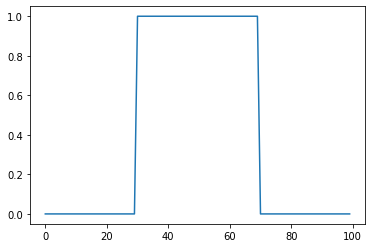

In [3]:
T = 100
x = np.zeros(T)
x[30:70] = 1

plt.plot(x)
plt.show()

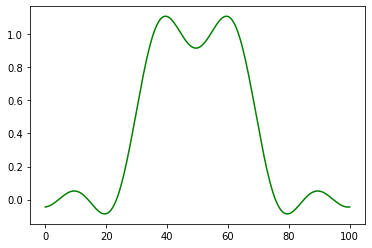

In [8]:
F = np.fft.fft(x)
A = np.angle(F)
D = np.abs(F)
# Re, Im = np.real(F), np.imag(F)
# A = np.arctan2(Im, Re)
# D = np.sqrt(Re**2, Im**2)

x2 = np.linspace(0, T, int(2*T))
u = 1/T

# 取前 num 条三角函数曲线叠加
num = 5

Fu = D[0] / T # 直流分量
for n in range(1, num):
    Fu += (2/T) * D[n] * np.cos(2 * np.pi * n * x2 * u + A[n])

plt.plot(x2, Fu, 'g')
plt.show()

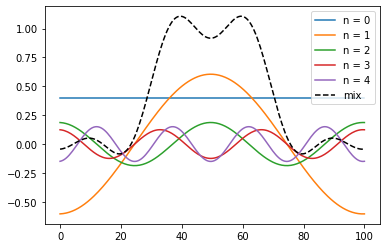

In [135]:
plt.figure()

y0 = D[0] / T
plt.plot(x2, y0+np.zeros_like(x2), label='n = 0')
for n in range(1, num):
    y = (2/T) * D[n] * np.cos(2 * np.pi * n * x2 * u + A[n])
    plt.plot(x2, y, label=f'n = {n}')

plt.plot(x2, Fu, 'k--', label='mix')

plt.legend()
plt.show()

#### 一维傅里叶变换
对于定义域为整个时间轴（这里用 $x$ 表示）上的非周期函数 $f(x), (-\infty < x < \infty)$，无法通过周期延拓将其扩展成周期函数，这是可以用傅里叶变换
$$
F(u) =\int_{-\infty}^{\infty} f(x) e^{-i2\pi ux}dx \tag{6}
$$
由 $F(u)$ 还可以通过傅里叶反变换获得 $f(x)$
$$
f(x) =\int_{-\infty}^{\infty} F(u) e^{i2\pi ux}du \tag{7}
$$
这里可以把 $F(u)$ 看作是傅里叶级数中的加权系数，而函数周期变成了 $T\rightarrow \infty$。

#### 一维离散傅里叶变换
一维函数 $f(x), (x=0,1,\cdots, M_1 -1)$ 的傅里叶变换的离散形式为：
$$
F(u) = \sum_{x=0}^{M_1 - 1} f(x) e^{-i2\pi ux/M_2}, u=0,1,\cdots, M_2 - 1 \tag{8}
$$
相应的反变换为
$$
f(x) = \frac{1}{M}\sum_{u=0}^{M - 1} F(u) e^{i2\pi ux/M_2}, x=0,1,\cdots, M_1 - 1 \tag{9}
$$
通常取 $M_1=M_2$，下述为了方便，一律用 $M$ 代替，之后的二维情形也类似。

对式$(9)$中的系数 $1/M$，可以放在式$(8)$前，或者两者前均为 $1/\sqrt M$，只要保证乘积为 $1/M$ 即可。

---
注：以下为简单描述
#### 一维离散傅里叶变换
一维函数 $f(x), (x=0,1,\cdots, M -1)$ 的傅里叶变换的离散形式为：
$$
F(u) = \sum_{x=0}^{M - 1} f(x) e^{-i2\pi ux/M}
= \sum_{x=0}^{M - 1} f(x) {\rm cos} \frac{-2\pi ux}{M} + j\sum_{x=0}^{M - 1} f(x) {\rm sin} \frac{-2\pi ux}{M},\quad u=0,1,\cdots, M - 1 \tag{8}
$$
相应的反变换为
$$
f(x) = \frac{1}{M}\sum_{u=0}^{M - 1} F(u) e^{i2\pi ux/M}
=  \frac{1}{M}\sum_{u=0}^{M - 1} F(u) {\rm cos} \frac{2\pi ux}{M} + j\frac{1}{M}\sum_{u=0}^{M - 1} F(u) {\rm sin} \frac{2\pi ux}{M},\quad x=0,1,\cdots, M - 1 \tag{9}
$$

对式$(9)$中的系数 $1/M$，可以放在式$(8)$前，或者两者前均为 $1/\sqrt M$，只要保证乘积为 $1/M$ 即可。

---

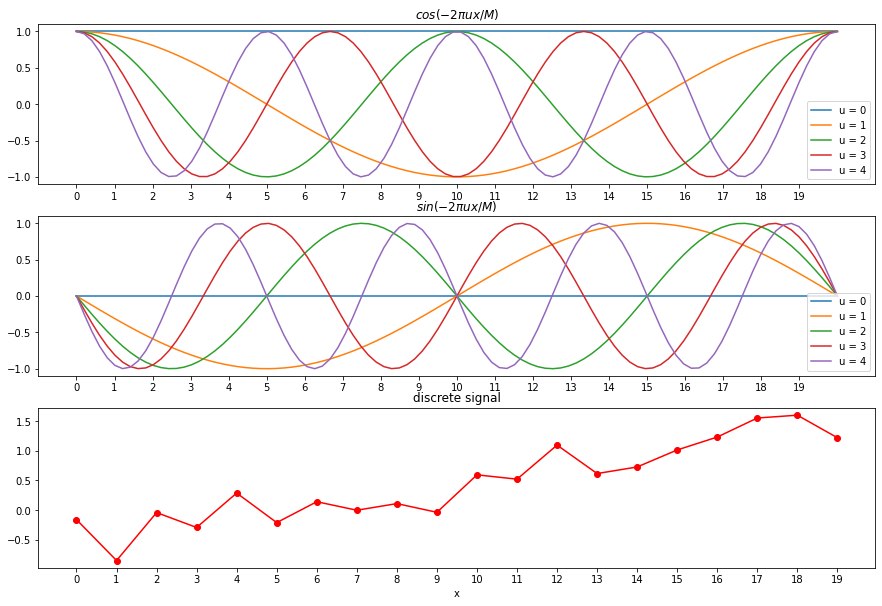

In [10]:
## 基函数图像
us = [0, 1, 2, 3, 4]
M  = 20
fx = np.linspace(-1, 1, M) + np.random.rand(M)

fig, ax = plt.subplots(3, 1, figsize=(15, 10))
xx = np.linspace(0, M, 5*M)
for u in us:
    y = np.cos(-2 * np.pi * u * xx / M)
    ax[0].plot(xx, y, label=f'u = {u}')
    ax[0].set_xticks(range(0, M))

for u in us:
    y = np.sin(-2 * np.pi * u * xx / M)
    ax[1].plot(xx, y, label=f'u = {u}')
    ax[1].set_xticks(range(0, M))

ax[2].plot(np.arange(M), fx, 'ro-')
ax[2].set_xticks(range(0, M))

ax[0].legend(loc='lower right')
ax[0].set_title('$cos(-2\pi ux/M)$')
ax[1].legend(loc='lower right')
ax[1].set_title('$sin(-2\pi ux/M)$')
ax[2].set_title('discrete signal')
ax[2].set_xlabel('x')
plt.show()


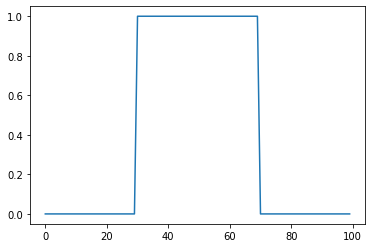

In [50]:
## 方波恢复
M = 100
fx = np.zeros(M)
fx[30:70] = 1

Fu = np.zeros(M, dtype=np.complex128)

x = np.arange(0, M)
for u in range(M):
    Fu[u] = (fx * np.exp(-2j * np.pi * u * x / M)).sum()

Fu = np.fft.fft(fx)

num = 100
fx2 = np.zeros(M, dtype=np.complex128)

u = np.arange(num)
for x in range(M):
    fx2[x] = (Fu[:num] * np.exp(2j * np.pi * u * x / M)).sum() / M
    

plt.plot(np.real(fx2))
plt.show()

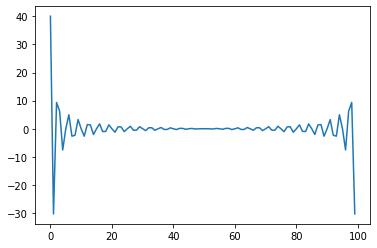

In [34]:
plt.plot(np.real(Fu))

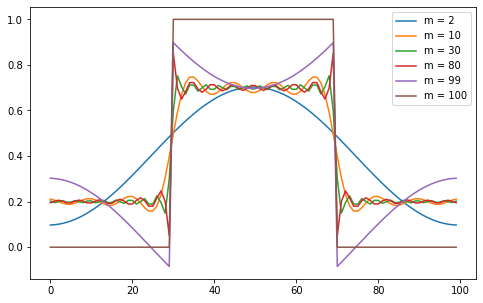

In [52]:
## 方波信号恢复

M = 100
fx = np.zeros(M)
fx[30:70] = 1

Fu = np.zeros(M, dtype=np.complex128)

x  = np.arange(0, M)
for u in range(M):
    Fu[u] = (fx * np.exp(-2j * np.pi * u * x / M)).sum()

def calc_ifft(num, M=M):
    fx2 = np.zeros(M, dtype=np.complex128)
    u = np.arange(num)
    for x in range(M):
        fx2[x] = (Fu[:num] * np.exp(2j * np.pi * u * x / M)).sum() / M
    return fx2

plt.figure(figsize=(8,5))

## num 定义恢复阶数
for num in [2, 10, 30, 80, 99, 100]:
    fx2 = calc_ifft(num, M)
    plt.plot(np.real(fx2), label=f'm = {num}')

plt.legend()
plt.show()

#### 二维连续傅里叶变换
二维傅里叶变换定义：
$$
F(u,v) =\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
f(x,y) e^{-i2\pi (ux+vy)} dxdy \tag{10}
$$
其反变换为
$$
f(x,y) =\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
F(u,v) e^{i2\pi (ux+vy)} dudv \tag{11}
$$

#### 二维离散傅里叶变换(DFT)
$$
F(u,v) = \sum_{x=0}^{M - 1} \sum_{y=0}^{N - 1}
f(x,y) e^{-i2\pi (ux/M + vy/N)},\quad
u = 0,1,\cdots, M-1; v=0,1,\cdots,N-1 \tag{12}
$$

$$
f(x,y) = \frac{1}{MN}\sum_{u=0}^{M - 1} \sum_{v=0}^{N - 1}
F(u,v) e^{i2\pi (ux/M + vy/N)},\quad
u = 0,1,\cdots, M-1; v=0,1,\cdots,N-1 \tag{13}
$$
类似地，系数 $1/MN$也可在式 $(12)$ 前面。

根据式 $(13)$，频域原点位置的傅里叶变换为
$$
F(0,0) = \sum_{x=0}^{M - 1} \sum_{y=0}^{N - 1} f(x,y) \tag{14}
$$
表示图像个像素灰度之和，如果前面由系数 $1/MN$，则表示图像的平均灰度。有时把 $F(0,0)$ 称作频率谱的直流分量。

对于式 $(12)$，$F(u,v)$ 中 $u,v$ 可以看作频率，对复数部分，分解成实部 $Re$ 和虚部 $Im$，其中
$$
Re = cos(2\pi (ux/M+vy/N)) \\
Im = sin(2\pi (ux/M+vy/N))
$$
两部分分别对图像 $f$ 逐元素相乘后求和，分别得到 $F(u,v)$ 的实部和虚部。

振幅谱
$$
Amp = \sqrt{R^2 + I^2}
$$
相位谱
$$
Angle = arctan\frac{I}{R}
$$

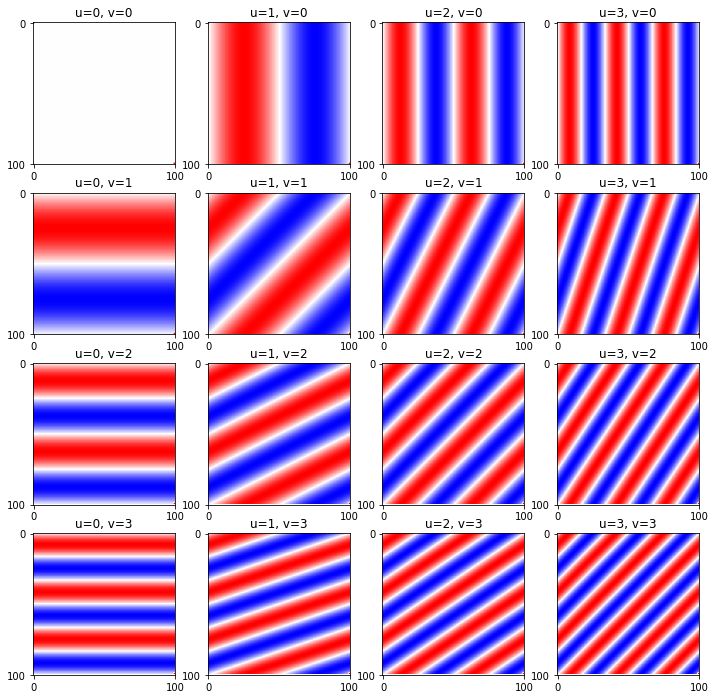

In [7]:
# 二维三角函数绘图
M, N = 100, 100
x = np.arange(0, M)
y = np.arange(0, N).reshape(N, 1)

umax, vmax = 4, 4

fig, ax = plt.subplots(nrows=umax, ncols=vmax, figsize=(12,12))

for v in range(vmax):
    for u in range(umax):
        Re = np.sin(2 * np.pi * (u*x/M + v*y/N))
        Re[0,0] = -1 # 绘图技巧，让ax[0,0]图案为红色或白色
        Re[M-1, N-1] = 1 # 绘图技巧，让ax[0,0]图案为红色或白色
        ax[v,u].imshow(Re, cmap='bwr')
        ax[v,u].set_title(f'u={u}, v={v}')
        ax[v,u].set_xticks([0, 100])
        ax[v,u].set_yticks([0, 100])

plt.show()

## 1. 傅里叶变换

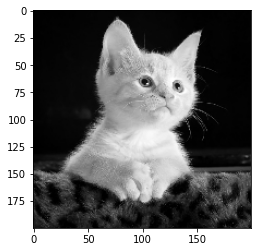

In [8]:
I = cv.imread('pic/cat500x480.jpg', 0)
I = cv.resize(I, (200,200)) 
show(I)

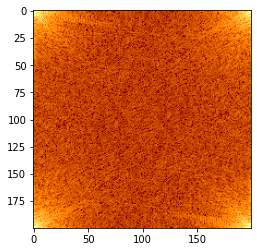

In [9]:
F = np.fft.fft2(I)

plt.imshow(np.log(np.abs(F) + 1), cmap='afmhot')
plt.show()

In [12]:
I2.shape

(200, 200)

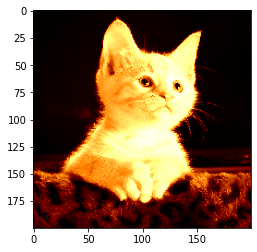

In [19]:
F = np.fft.fft2(I)
F = np.fft.fftshift(F)
I2 = np.fft.ifft2(F)

plt.imshow(np.abs(I2), cmap='afmhot')
plt.show()

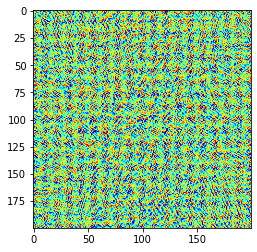

In [35]:
F = np.fft.fft2(I)
T = np.arctan2(np.imag(F), np.real(F)) # 注意 np.arctan2(y, x) 的参数顺序

plt.imshow(T, cmap='jet')
plt.show()

In [88]:
F.shape

(200, 200)

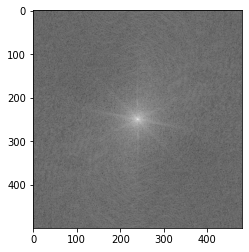

In [25]:
F = np.fft.fft2(I)
F = np.fft.fftshift(F)
show(np.log(np.abs(F) + 1))

## 2. 傅里叶变换实现

In [111]:
def my_fft2(I, u, v):
    N, M = I.shape
    Re = 0.0
    Im = 0.0
    for x in range(M):
        for y in range(N):
            power = -2 * np.pi * (u*x/M + v*y/N)
            Re += I[y,x] * np.cos(power)
            Im += I[y,x] * np.sin(power)
    return Re + Im*1j

## 3. 巴特沃斯低通滤波器

$$
H(u,v) = \frac{1}{1 + \left[\frac{D(u,v)}{D_0}\right]^{2n}}
$$
其中，$D_0$ 称为截止频率， $n$ 为阶数，
$$
D(u,v) = \sqrt{(u-\frac{M}{2})^2 + (v-\frac{N}{2})^2}
$$

In [8]:
def get_low_pass(rows, cols, D0, n=3):
    sr, er = rows//2-rows, rows//2
    sc, ec = cols//2-cols, cols//2
    x, y = np.meshgrid(np.arange(sr, er), np.arange(sc, ec))
    D = np.sqrt(x**2 + y**2)
    H = 1.0 / (1 + D/D0)**(2*n)
    return H

In [18]:
def get_low_pass_filter(N, M, D0, n):
    xx, yy = np.meshgrid(np.arange(M)-M//2, np.arange(N)-N//2)
    D = np.sqrt(xx**2 + yy**2)
    H = 1.0 / (1 + (D/D0)**(2*n))
    return H

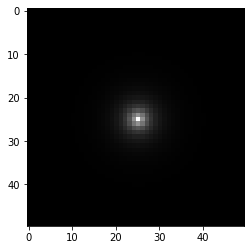

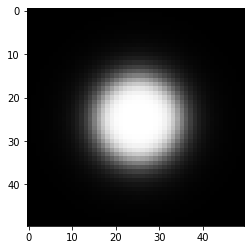

In [19]:
show(get_low_pass(50,50,10, 3))
show(get_low_pass_filter(50,50,10, 3))

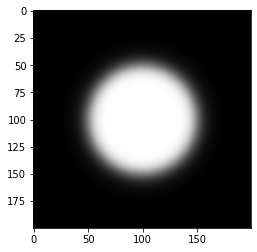

In [16]:
show(H)

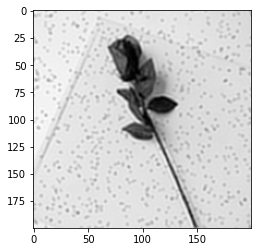

In [15]:
I = cv.imread('pic/rose_spnoise_200x200.jpg', 0)
N, M = I.shape

F  = np.fft.fft2(I)
D0 = 50
n  = 6
H  = get_low_pass_filter(N, M, D0, n)
Fs = np.fft.fftshift(F)
HF = H * Fs
I2 = np.fft.ifft2(HF)
I2 = np.abs(I2)

show(I2)

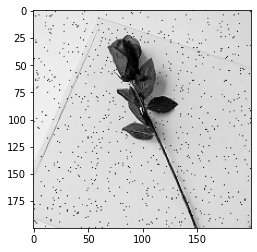

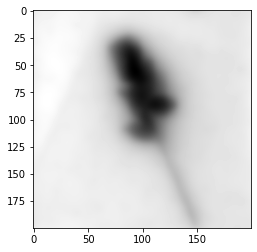

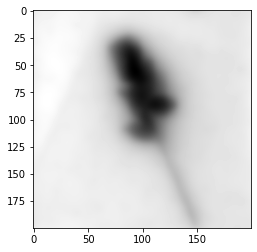

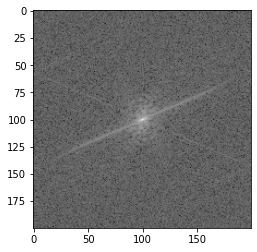

In [45]:
I = cv.imread('pic/rose_spnoise_200x200.jpg', 0)
F = np.fft.fft2(I)
F = np.fft.fftshift(F)

Famp = np.abs(F)
Fang = np.angle(F)


n = 6
D0 = 50
H = get_low_pass(200, 200, D0, n)
K = F * H

F2 = Famp * H
K2 = F2 * np.cos(Fang) + 1j * F2 * np.sin(Fang)
L2 = np.abs(np.fft.ifft2(K2))

L = np.fft.ifft2(K)
L = np.abs(L)

show(I)
show(L)
show(L2)
show(np.log(np.abs(F) + 1))

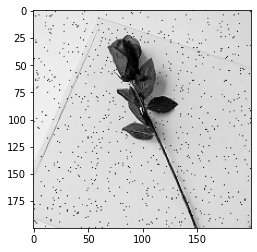

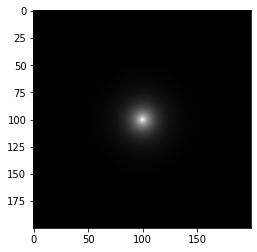

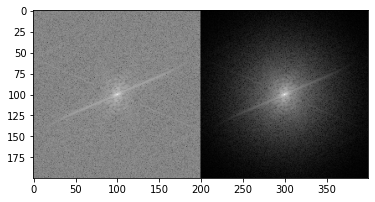

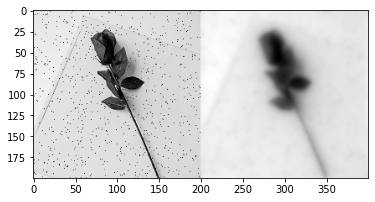

In [48]:
I = cv.imread('pic/rose_spnoise_200x200.jpg', 0)
F = np.fft.fft2(I)
F = np.fft.fftshift(F)

n = 6
D0 = 100
H = get_low_pass(200, 200, D0, n)
K = F * H
# K = np.fft.fftshift(K)

L = np.fft.ifft2(K)
L = np.abs(L)
L = cv.normalize(L, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

show(I)
show(H)
show(np.log(np.abs(np.c_[F, K]) + 1))
show(np.c_[I, L])

## 巴特沃斯高通滤波器
$$
H(u,v) = \frac{1}{1 + \left[\frac{D_0}{D(u,v)}\right]^{2n}}
$$
其中，$D_0$ 称为截止频率， $n$ 为阶数，
$$
D(u,v) = \sqrt{(u-\frac{M}{2})^2 + (v-\frac{N}{2})^2}
$$

In [3]:
def get_high_pass(rows, cols, D0, n=3):
    sr, er = rows//2-rows, rows//2
    sc, ec = cols//2-cols, cols//2
    x, y = np.meshgrid(np.arange(sr, er), np.arange(sc, ec))
    D = np.sqrt(x**2 + y**2)
    H = 1.0 / (1 + D0 / (D+1e-2))**(2*n)
    return H

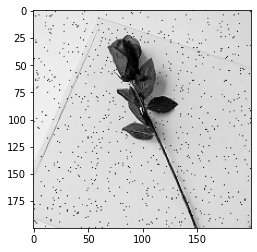

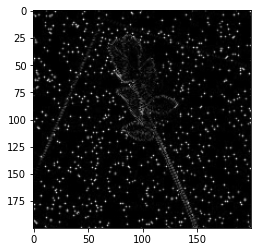

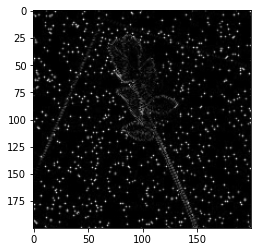

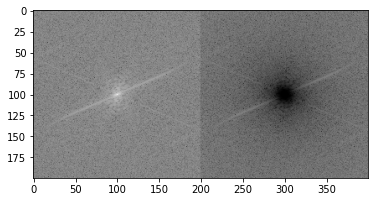

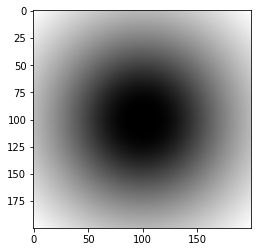

In [7]:
I = cv.imread('pic/rose_spnoise_200x200.jpg', 0)
F = np.fft.fft2(I)
F = np.fft.fftshift(F)

n = 6
D0 = 10
H = get_high_pass(200, 200, D0, n)
K = F * H

L = np.fft.ifft2(K)
L = np.abs(L)

Famp = np.abs(F)
Fang = np.angle(F)
F2 = Famp * H
K2 = F2 * np.cos(Fang) + 1j * F2 * np.sin(Fang)
L2 = np.abs(np.fft.ifft2(K2))

show(I)
show(L)
show(L2)
show(np.log(np.abs(np.c_[F, K]) + 1))
show(H)

## 4. 图像融合

In [112]:
import numpy.fft as fft

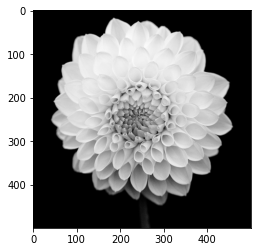

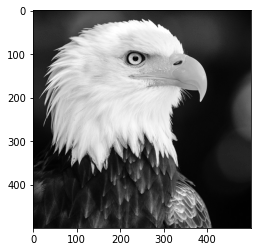

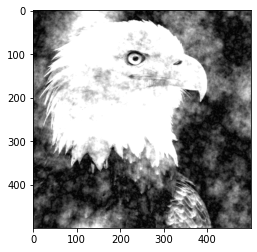

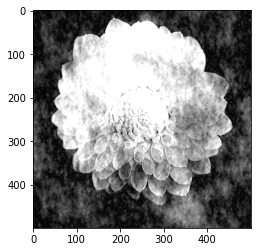

In [151]:
A = cv.imread('pic/flower500x500.jpg', 0)
B = cv.imread('pic/eagle500x500.jpg', 0)

# A = np.zeros((500,500), np.uint8)
# cv.rectangle(A, (0, 100), (300,200), 255, -1)
# cv.rectangle(A, (200, 300), (300,200), 255, -1)
# cv.rectangle(A, (0, 300), (300,400), 255, -1)

# B = np.zeros((500,500), np.uint8)
# cv.circle(B, (250, 250), 100, 255, -1)
# cv.circle(B, (350, 350), 50, 255, -1)


Af = fft.fft2(A)
Bf = fft.fft2(B)

Af_abs, Af_ang = np.abs(Af), np.angle(Af)
Bf_abs, Bf_ang = np.abs(Bf), np.angle(Bf)

F1 = Af_abs * np.cos(Bf_ang) + 1j * Af_abs * np.sin(Bf_ang)
F2 = Bf_abs * np.cos(Af_ang) + 1j * Bf_abs * np.sin(Af_ang)

I1 = np.abs(fft.ifft2(F1))
I2 = np.abs(fft.ifft2(F2))


show(A)
show(B)
show(I1.clip(0, I1.max()/2))
show(I2.clip(0, I2.max()/2))

In [146]:
I2.min()

0.04328896168676677

## 5. 同态滤波

In [105]:
def get_homo_filter(rows, cols, D0, rl=-1, rh=2, c=4):
    sr, er = rows//2-rows, rows//2
    sc, ec = cols//2-cols, cols//2
    x, y = np.meshgrid(np.arange(sr, er), np.arange(sc, ec))
    D = np.sqrt(x**2 + y**2)
    H = (rh - rl) * (1 - np.exp(-c * (1 + D/D0)**2)) + rl
#     H = H/H.max()
    return H

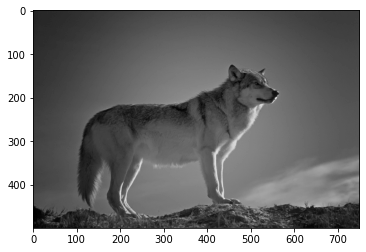

In [108]:
I = cv.imread('pic/wolf500x750.jpg', 0)
h, w = I.shape

lnI = np.log(I.astype(np.float64) + 1)
FlnI = np.fft.fftshift(np.fft.fft2(lnI))

D0 = 50
n = 5
H = get_homo_filter(750, 500, D0, rl=0.5, rh=1, c=1)
FlnIH = H * FlnI

FlnIH = np.fft.fftshift(FlnIH)
F2 = np.abs(np.fft.ifft2(FlnIH))
I2 = np.exp(F2)

show(I2)

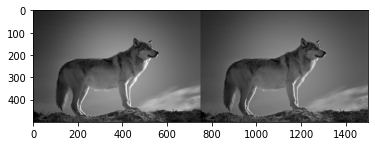

In [109]:
I22 = cv.normalize(I2, None, 0, 255, cv.NORM_MINMAX)
show(np.hstack([I, I22]))